In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib as mpl

%matplotlib inline


def usln_book(t, omega, tau, u0):
    return u0*np.exp(2*tau*(1+omega)*t)

def usln_cem(t, omega, tau, u0):
    return u0*np.exp(2*tau*(1+omega)*t)

def vsln_book(t, omega, tau, u0, v0):
    v1 = v0*np.exp(-(2*tau+tau**2)*t)
    v2 = np.exp(2*tau*(omega+1)*t) - np.exp((2*tau+tau**2)*t)
    v2 *= (tau*(1+omega)*u0) / (2*omega-tau)
    return v1 + v2

def vsln_cem(t, omega, tau, u0, v0):
    v1 = v0*np.exp((tau**2+2*tau)*t)
    v2 = np.exp(2*tau*(1+omega)*t)
    v2 *= (u0*tau*(1+omega)) / (2*omega-tau)
    return v1+v2

def cossim_cem(t, omega, tau, u0, v0):
    nom = u0
    denom = u0*(1 + (tau*(1+omega)/(2*omega-tau))) + v0*np.exp(tau*(tau-2*omega)*t)
    return nom / denom

def cossim_closed_cem(t, omega, tau, s0):
    q1 = tau*omega*(1+0.5*tau)
    q2 = tau*(omega-0.5*tau)
    
    return q2 / (q1*(1-s0*np.exp(-2*q2*t)))

def cossim_closed_book(t, omega, tau, s0):
    q1 = tau*omega*(1+0.5*tau)
    q2 = tau*(omega-0.5*tau)
    
    if q2 == 0:
        val = 1/(np.power(s0, -2) + q1*t)
    else:
        val = q2 / ((q1 - (q1-q2*np.power(s0, -2))*np.exp(-2*q2*t)))
        
    return np.sqrt(val) * np.sign(s0)
    
def cossim_book(t, omega, tau, u0, v0):
    s0 = u0 / (u0+v0)
    
    q1 = tau*omega*(1+0.5*tau)
    q2 = tau*(omega-0.5*tau)
    
    val = q1/q2 + (1/s0 - q1/q2)*np.exp(-2*q2*t)
    return 1/val

In [292]:
def eqns(y, t, omega, tau):
    u_dot = 2*tau*(1+omega)*y[0]
    v_dot = tau**2*(1+omega)*y[0] + (tau**2+2*tau)*y[1]
    
    return [u_dot, v_dot]

def deq_S(y, t, omega, tau):
    q1 = tau*omega*(1+0.5*tau)
    q2 = tau*(omega-0.5*tau)
    
    return -q1*y**3 + q2*y

t_max = 20
tvals = np.linspace(0, t_max, 1000)
yinit = [0.001, 0.001]
omega = 1.0
tau = 0.05

y_odeint = odeint(eqns, yinit, tvals, (omega, tau))

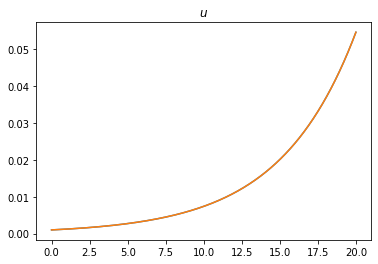

In [293]:
uvals_book = usln_book(tvals, omega, tau, yinit[0])

plt.plot(tvals, y_odeint[:, 0])
plt.plot(tvals, uvals_book)
plt.title("$u$");

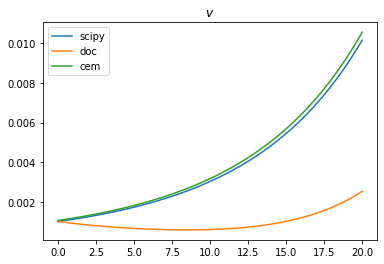

In [294]:
vvals_book = vsln_book(tvals, omega, tau, yinit[0], yinit[1])
vvals_cem = vsln_cem(tvals, omega, tau, yinit[0], yinit[1])

plt.plot(tvals, y_odeint[:, 1], label='scipy')
plt.plot(tvals, vvals_book, label='doc')
plt.plot(tvals, vvals_cem, label='cem')
plt.title('$v$')
plt.legend()

In [100]:
svals_cem = cossim_cem(tvals, omega, tau, yinit[0], yinit[1])
svals_book = cossim_book(tvals, omega, tau, yinit[0], yinit[1])
svals = y_odeint[:, 0] / (y_odeint[:, 0] + y_odeint[:, 1])

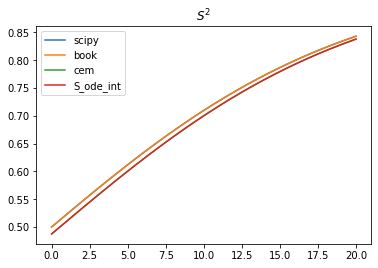

In [101]:
plt.plot(tvals, svals, label='scipy')
plt.plot(tvals, svals_book, label='book')
plt.plot(tvals, svals_cem, label='cem')

S_odeint = odeint(deq_S, np.sqrt(svals_cem[0]), tvals, (omega, tau))
plt.plot(tvals, np.square(S_odeint), label='S_ode_int')

plt.legend()
plt.title("$S^2$");
# These values hold but v is not same

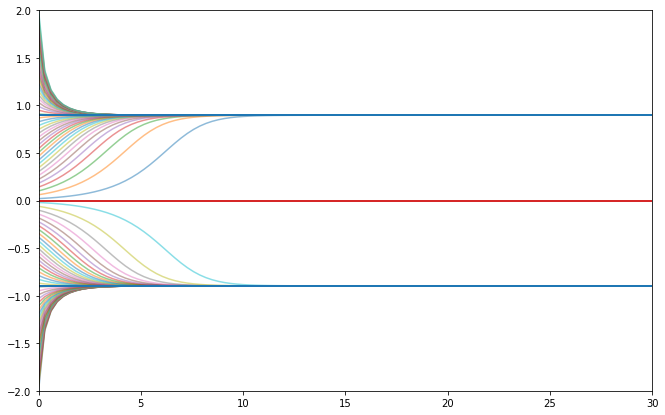

In [276]:
f,ax = plt.subplots(figsize=(11, 7))

omega = 2
tau = 0.3
tmax = 30

tvals = np.linspace(0, tmax, 100)
s_inits = np.linspace(-2, 2, 100)

for s0 in s_inits:
    plt.plot(tvals, cossim_closed_book(tvals, omega, tau, s0), alpha=0.5)
    
asympt = np.sqrt((omega-0.5*tau) / (omega*(1+0.5*tau)))

ax.axhline(asympt, c='C0', lw=2)
ax.axhline(-asympt, c='C0', lw=2)
ax.axhline(0, c='C3', lw=2)
ax.set_ylim(-2, 2)
ax.set_xlim(0, tmax);

/Users/cem/Documents/Migraine/ppgutils/venv/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in power


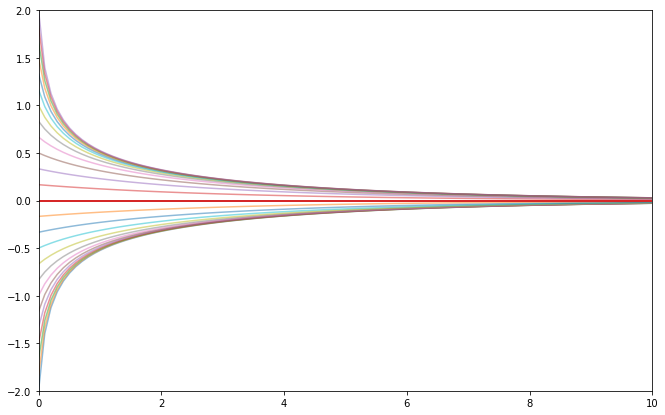

In [290]:
f,ax = plt.subplots(figsize=(11, 7))

omega = 0.5
tau = 1.4
tmax = 10

tvals = np.linspace(0, tmax, 100)
s_inits = np.linspace(-2, 2, 25)

for s0 in s_inits:
    plt.plot(tvals, cossim_closed_book(tvals, omega, tau, s0), alpha=0.5)
    
ax.axhline(0, c='C3', lw=2)
ax.set_ylim(-2, 2)
ax.set_xlim(0, tmax);

/Users/cem/Documents/Migraine/ppgutils/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


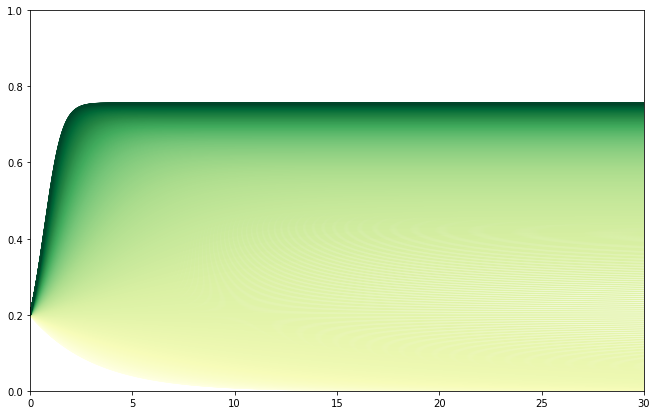

In [274]:
# It's obvious tau affects the convergence speed. I wonder the relation between w so plot it too

f,ax = plt.subplots(figsize=(11, 7))

omegas = np.linspace(0, 2, 1000)
tau = 0.8
tmax = 30
s0 = 0.2

tvals = np.linspace(0, tmax, 1000)
cmap = mpl.cm.get_cmap('YlGn')
s_steadies = []

for omega in omegas:
    plt.plot(tvals, cossim_closed_book(tvals, omega, tau, s0), c=cmap(omega/2))
    s_steadies.append(np.max([0, (omega-0.5*tau)/(omega*(1+0.5*tau))]))
    
ax.set_ylim(0, 1)
ax.set_xlim(0, tmax);

Text(0, 0.5, '$S^2_{\\infty}$')

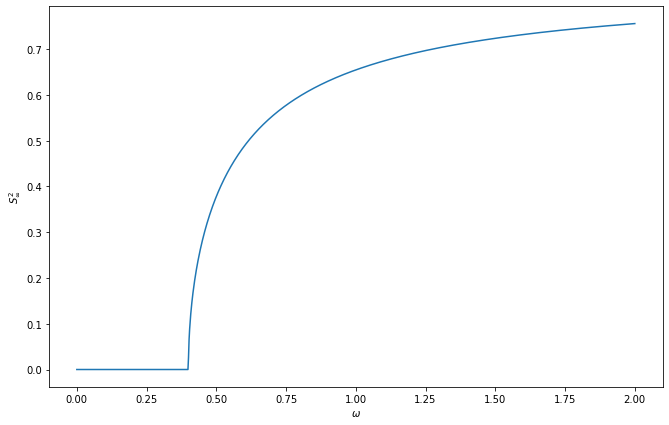

In [275]:
f,ax = plt.subplots(figsize=(11, 7))

plt.plot(omegas, np.sqrt(s_steadies))
plt.xlabel("$\omega$")
plt.ylabel("$S^2_{\infty}$")